# Practice Spacy

Avant d'aller plus loin dans le Deep Learning notamment textuel, regardons Spacy avec du scrapping

*Voici le code à reproduire pour scrapper des données. Cela peut se faire sur n'importe quel site :

```
import requests
from bs4 import BeautifulSoup
r = requests.get("https://fr.wikipedia.org/wiki/Buzz_Aldrin")
html_doc = r.text
soup = BeautifulSoup(html_doc, 'html.parser')

corpus = [ ]
for p in soup.find_all("p"):
  corpus.append(p.text)
```

In [1]:
import requests
from bs4 import BeautifulSoup
#r = requests.get("https://fr.wikipedia.org/wiki/Buzz_Aldrin")
r = requests.get("https://fr.wikipedia.org/wiki/Kelly_Slater")
html_doc = r.text
soup = BeautifulSoup(html_doc, 'html.parser')
 
corpus = []
for p in soup.find_all("p"):
  corpus.append(p.text)

In [45]:
len(corpus) 

20

* If the code worked well, you should have the following ouput

In [47]:
corpus

['\n\t\tPages pour les éditeurs déconnectés en savoir plus\n',
 'Pour les articles homonymes, voir Slater.\n',
 'Cet article ne cite pas suffisamment ses sources (mai 2017).\n',
 "Si vous disposez d'ouvrages ou d'articles de référence ou si vous connaissez des sites web de qualité traitant du thème abordé ici, merci de compléter l'article en donnant les références utiles à sa vérifiabilité et en les liant à la section «\xa0Notes et références\xa0» \n",
 'En pratique\xa0: Quelles sources sont attendues\xa0? Comment ajouter mes sources\xa0?\n',
 '\n',
 "Kelly Slater (né Robert Kelly Slater le 11 février 1972 à Cocoa Beach en Floride) est un surfeur professionnel américain. Il détient onze titres de champion du monde et plus de cinquante victoires sur le circuit d'élite ce qui constitue un record[1].\n",
 "Robert Kelly Slater est né à Cocoa Beach, en Floride. d'une mère aux racines irlandaises et d'un père d'ancêtres syriens .[2],[3],[4] Il a deux frères, Sean, plus âgé et Stephen, plus j

* Installer les modules de `spacy` correspondant aux spécificités du langage (nous utilserons le français pour ce TP). Donc installer `fr_core_news_sm`. 
  * La documentation : [English](https://spacy.io/models/fr)

In [4]:
pip install spacy


  Using cached pydantic-1.8.2-cp38-cp38-win_amd64.whl (2.0 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: typing-extensions>=3.7.4.3 in c:\users\simplon\anaconda3\lib\site-packages (from pydantic!=1.8,!=1.8.1,<1.9.0,>=1.7.4->spacy) (3.7.4.3)

  Created wheel for langcodes: filename=langcodes-3.2.1-py3-none-any.whl size=169379 sha256=b6b0c9b38bf0a55cc2bace0d597e21d9475b045ed384eff6ef06b56017355ee5
  Stored in directory: c:\users\simplon\appdata\local\pip\cache\wheels\aa\5b\45\2e2ebdd7b888ba82dac447122f8ea0f4a2404910516d486679
Successfully built langcodes


In [24]:
import spacy
import fr_core_news_sm

* Importez maintenant `fr_core_news_sm` --> [Documentation](https://spacy.io/models)

In [26]:
#2éme methode

#doc  =  nlp ( "Ceci est une phrase." )
#nlp  =  fr_core_news_sm.load () 
#doc  =  nlp ( "Ceci est une phrase." )


In [52]:
import fr_core_news_sm
nlp = spacy.load("fr_core_news_sm")

dir(nlp)

['Defaults',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_components',
 '_config',
 '_disabled',
 '_ensure_doc',
 '_ensure_doc_with_context',
 '_factory_meta',
 '_get_pipe_index',
 '_has_gpu_model',
 '_link_components',
 '_meta',
 '_multiprocessing_pipe',
 '_optimizer',
 '_path',
 '_pipe_configs',
 '_pipe_meta',
 'add_pipe',
 'analyze_pipes',
 'batch_size',
 'begin_training',
 'component',
 'component_names',
 'components',
 'config',
 'create_optimizer',
 'create_pipe',
 'create_pipe_from_source',
 'default_config',
 'default_error_handler',
 'disable_pipe',
 'disable_pipes',
 'disabled',
 'enable_pipe',
 'evaluate',
 'factories',

* Maintenant vous devez créer un corpus de texte dans une variable. C'est une bonne pratique d'utilisation de Spacy. Vous allez donc devoir créer un corpus de texte "propre", pour cela utilisez les fonctions suivantes : : 
  * join()
  * [encode() / decode()] n'est pas obligatoire, mais à creuser
  * strip() 

In [85]:
text = ' '.join(corpus).strip().replace("",'')
text

'Pages pour les éditeurs déconnectés en savoir plus\n Pour les articles homonymes, voir Slater.\n Cet article ne cite pas suffisamment ses sources (mai 2017).\n Si vous disposez d\'ouvrages ou d\'articles de référence ou si vous connaissez des sites web de qualité traitant du thème abordé ici, merci de compléter l\'article en donnant les références utiles à sa vérifiabilité et en les liant à la section «\xa0Notes et références\xa0» \n En pratique\xa0: Quelles sources sont attendues\xa0? Comment ajouter mes sources\xa0?\n \n Kelly Slater (né Robert Kelly Slater le 11 février 1972 à Cocoa Beach en Floride) est un surfeur professionnel américain. Il détient onze titres de champion du monde et plus de cinquante victoires sur le circuit d\'élite ce qui constitue un record[1].\n Robert Kelly Slater est né à Cocoa Beach, en Floride. d\'une mère aux racines irlandaises et d\'un père d\'ancêtres syriens .[2],[3],[4] Il a deux frères, Sean, plus âgé et Stephen, plus jeune, surfeurs également. So

In [86]:
print(text)

Pages pour les éditeurs déconnectés en savoir plus
 Pour les articles homonymes, voir Slater.
 Cet article ne cite pas suffisamment ses sources (mai 2017).
 Si vous disposez d'ouvrages ou d'articles de référence ou si vous connaissez des sites web de qualité traitant du thème abordé ici, merci de compléter l'article en donnant les références utiles à sa vérifiabilité et en les liant à la section « Notes et références » 
 En pratique : Quelles sources sont attendues ? Comment ajouter mes sources ?
 
 Kelly Slater (né Robert Kelly Slater le 11 février 1972 à Cocoa Beach en Floride) est un surfeur professionnel américain. Il détient onze titres de champion du monde et plus de cinquante victoires sur le circuit d'élite ce qui constitue un record[1].
 Robert Kelly Slater est né à Cocoa Beach, en Floride. d'une mère aux racines irlandaises et d'un père d'ancêtres syriens .[2],[3],[4] Il a deux frères, Sean, plus âgé et Stephen, plus jeune, surfeurs également. Son père tient un magasin de pêc

In [87]:
text = text.split('\n')
text

['Pages pour les éditeurs déconnectés en savoir plus',
 ' Pour les articles homonymes, voir Slater.',
 ' Cet article ne cite pas suffisamment ses sources (mai 2017).',
 " Si vous disposez d'ouvrages ou d'articles de référence ou si vous connaissez des sites web de qualité traitant du thème abordé ici, merci de compléter l'article en donnant les références utiles à sa vérifiabilité et en les liant à la section «\xa0Notes et références\xa0» ",
 ' En pratique\xa0: Quelles sources sont attendues\xa0? Comment ajouter mes sources\xa0?',
 ' ',
 " Kelly Slater (né Robert Kelly Slater le 11 février 1972 à Cocoa Beach en Floride) est un surfeur professionnel américain. Il détient onze titres de champion du monde et plus de cinquante victoires sur le circuit d'élite ce qui constitue un record[1].",
 " Robert Kelly Slater est né à Cocoa Beach, en Floride. d'une mère aux racines irlandaises et d'un père d'ancêtres syriens .[2],[3],[4] Il a deux frères, Sean, plus âgé et Stephen, plus jeune, surfeur

* Maintenant ajoutez votre corpus complet dans spacy avec la ligne de commande `fr_core_news_sm.load()`.

In [89]:
join_text=' '.join(text)
print(join_text)

Pages pour les éditeurs déconnectés en savoir plus  Pour les articles homonymes, voir Slater.  Cet article ne cite pas suffisamment ses sources (mai 2017).  Si vous disposez d'ouvrages ou d'articles de référence ou si vous connaissez des sites web de qualité traitant du thème abordé ici, merci de compléter l'article en donnant les références utiles à sa vérifiabilité et en les liant à la section « Notes et références »   En pratique : Quelles sources sont attendues ? Comment ajouter mes sources ?    Kelly Slater (né Robert Kelly Slater le 11 février 1972 à Cocoa Beach en Floride) est un surfeur professionnel américain. Il détient onze titres de champion du monde et plus de cinquante victoires sur le circuit d'élite ce qui constitue un record[1].  Robert Kelly Slater est né à Cocoa Beach, en Floride. d'une mère aux racines irlandaises et d'un père d'ancêtres syriens .[2],[3],[4] Il a deux frères, Sean, plus âgé et Stephen, plus jeune, surfeurs également. Son père tient un magasin de pêc

In [92]:
doc=nlp(join_text)


* Avec une visualisation de type worcloud et la librairie `wordcloud`, créez un premier nuage de mot

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(join_text)
word_cloud

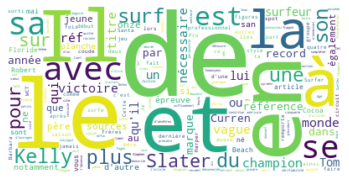

In [100]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* Maintenant éliminons les mots de liaison (stopwords) avec `spacy`

In [102]:
from spacy.lang.fr.stop_words import STOP_WORDS

print(STOP_WORDS) 

{'pourrais', 'possible', 'différentes', 'cela', 'serait', 'comment', 'toujours', 'touchant', 'depuis', 'lesquelles', 'precisement', 'quelle', 'assez', 'procedant', 'semblable', 'aura', 'ne', 'celles-ci', 'ès', 'peux', 'soi-même', 'excepté', 'auxquelles', 'cinquième', 'tiens', 'stop', 'sienne', 'effet', 'ont', 'basee', 'du', 'suivante', 'na', 'o', 'relativement', 'aie', 'pas', 'parle', 'merci', 'chez', 'possibles', 'seront', 'egalement', 'restant', 'doivent', "n'", 'environ', 'hou', 'malgré', 'parfois', 'y', 'auxquels', 'une', 'étaient', 'autrement', 'autrui', 'etre', 'devers', 'si', 'bat', 'l’', 'un', 'leur', 'lesquels', 'elles', 'qui', 'ce', 'concernant', 's’', 'exactement', 'differents', 'cinquante', 'faisaient', 'faisant', 'jusque', 'bas', 'desormais', 'notre', 'dans', 'tels', 'six', 'les', 'differentes', 'mêmes', 'parmi', 'dessous', 'prealable', 'votres', 'pendant', 'relative', 'ci', "d'", 'puisque', 'quand', 'antérieures', 'ouverte', 'personne', 'afin', 'suffisante', 'de', 'elle-m

In [123]:
join_text

'Pages pour les éditeurs déconnectés en savoir plus  Pour les articles homonymes, voir Slater.  Cet article ne cite pas suffisamment ses sources (mai 2017).  Si vous disposez d\'ouvrages ou d\'articles de référence ou si vous connaissez des sites web de qualité traitant du thème abordé ici, merci de compléter l\'article en donnant les références utiles à sa vérifiabilité et en les liant à la section «\xa0Notes et références\xa0»   En pratique\xa0: Quelles sources sont attendues\xa0? Comment ajouter mes sources\xa0?    Kelly Slater (né Robert Kelly Slater le 11 février 1972 à Cocoa Beach en Floride) est un surfeur professionnel américain. Il détient onze titres de champion du monde et plus de cinquante victoires sur le circuit d\'élite ce qui constitue un record[1].  Robert Kelly Slater est né à Cocoa Beach, en Floride. d\'une mère aux racines irlandaises et d\'un père d\'ancêtres syriens .[2],[3],[4] Il a deux frères, Sean, plus âgé et Stephen, plus jeune, surfeurs également. Son père 

['Pages', 'éditeurs', 'déconnectés', 'savoir', ' ', 'articles', 'homonymes', ',', 'voir', 'Slater', '.', ' ', 'article', 'cite', 'suffisamment', 'sources', '(', 'mai', '2017', ')', '.', ' ', 'disposez', 'ouvrages', 'articles', 'référence', 'connaissez', 'sites', 'web', 'qualité', 'traitant', 'thème', 'abordé', 'ici', ',', 'compléter', 'article', 'donnant', 'références', 'utiles', 'vérifiabilité', 'liant', 'section', '«', '\xa0', 'Notes', 'références', '\xa0', '»', '  ', 'pratique', '\xa0', ':', 'sources', 'attendues', '\xa0', '?', 'ajouter', 'sources', '\xa0', '?', '   ', 'Kelly', 'Slater', '(', 'né', 'Robert', 'Kelly', 'Slater', '11', 'février', '1972', 'Cocoa', 'Beach', 'Floride', ')', 'surfeur', 'professionnel', 'américain', '.', 'détient', 'titres', 'champion', 'monde', 'victoires', 'circuit', 'élite', 'constitue', 'record[1].', ' ', 'Robert', 'Kelly', 'Slater', 'né', 'Cocoa', 'Beach', ',', 'Floride', '.', 'mère', 'racines', 'irlandaises', 'père', 'ancêtres', 'syriens', '.[2],[3],[

* Faites un nouveau wordcloud sans les mots de liaisons.

In [155]:
# Create list of word tokens
token_list = []
for token in doc:
    token_list.append(token.text)
# Create list of word tokens after removing stopwords
filtered_sentence =[] 
for word in token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        filtered_sentence.append(word) 
#print(token_list)
print(filtered_sentence)  

text2=' '.join(filtered_sentence)


['Pages', 'éditeurs', 'déconnectés', 'savoir', ' ', 'articles', 'homonymes', ',', 'voir', 'Slater', '.', ' ', 'article', 'cite', 'suffisamment', 'sources', '(', 'mai', '2017', ')', '.', ' ', 'disposez', 'ouvrages', 'articles', 'référence', 'connaissez', 'sites', 'web', 'qualité', 'traitant', 'thème', 'abordé', 'ici', ',', 'compléter', 'article', 'donnant', 'références', 'utiles', 'vérifiabilité', 'liant', 'section', '«', '\xa0', 'Notes', 'références', '\xa0', '»', '  ', 'pratique', '\xa0', ':', 'sources', 'attendues', '\xa0', '?', 'ajouter', 'sources', '\xa0', '?', '   ', 'Kelly', 'Slater', '(', 'né', 'Robert', 'Kelly', 'Slater', '11', 'février', '1972', 'Cocoa', 'Beach', 'Floride', ')', 'surfeur', 'professionnel', 'américain', '.', 'détient', 'titres', 'champion', 'monde', 'victoires', 'circuit', 'élite', 'constitue', 'record[1].', ' ', 'Robert', 'Kelly', 'Slater', 'né', 'Cocoa', 'Beach', ',', 'Floride', '.', 'mère', 'racines', 'irlandaises', 'père', 'ancêtres', 'syriens', '.[2],[3],[

In [156]:
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)
word_cloud2

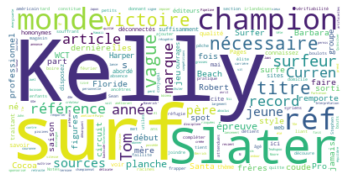

In [157]:
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

* Enfin, nous avons besoin d'avoir un corpus de mots lemmatisés, re-créez un corpus de mots lemmatisés et visualisez le nouveaux wordcloud.

In [158]:
import nltk 
nltk.download('wordnet') 
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SIMPLON\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [162]:
wnl = WordNetLemmatizer() 
 #Lemmatize
tokens_texte = nlp(text)
tokens=[]
for token in tokens_texte:
    tokens.append(token.lemma_)
print(tokens)


* Faites la même chose avec les mots stemmatisés (y compris la visualisation)

* Quelles sont vos analyses ?